### 1. [Preparing Data](#1)
### 2. [Model Training](#2)
### 3. [Model Evaluation](#3)
        1-Linear Regression
        2-Lasso  Regression




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

<a id='1'></a>
### 1.Preparing Data


In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2},
           "Seller_Type":{"Dealer":0,"Individual":1},
           "Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [9]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [10]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,0,0,0,0
96,innova,2016,20.75,25.39,29000,1,0,1,0
97,corolla altis,2017,17.00,18.64,8700,0,0,0,0
98,corolla altis,2013,7.05,18.61,45000,0,0,0,0


<a id='2'></a>
### 2.Model Training


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [12]:
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

<a id='3'></a>
### 3.Model Evaluation

    1-Linear Regression
    2-Lasso Regression

#### 1-Linear Regression

In [14]:
training_data_prediction = lin_reg_model.predict(x_train)
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8806173715719129


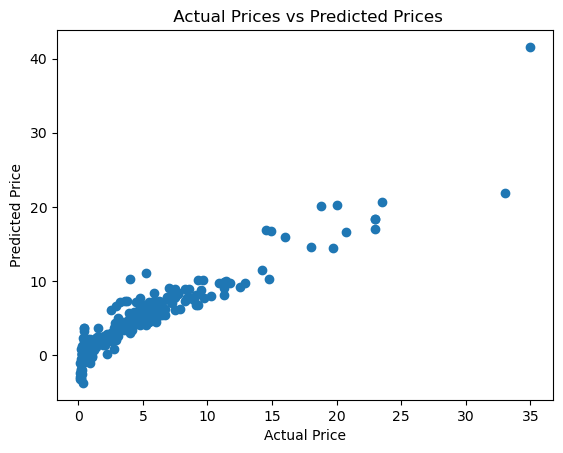

In [15]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [16]:
test_data_pred = lin_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_pred)
print(f"R squared Error : {error_score}")

R squared Error : 0.8311069476244114


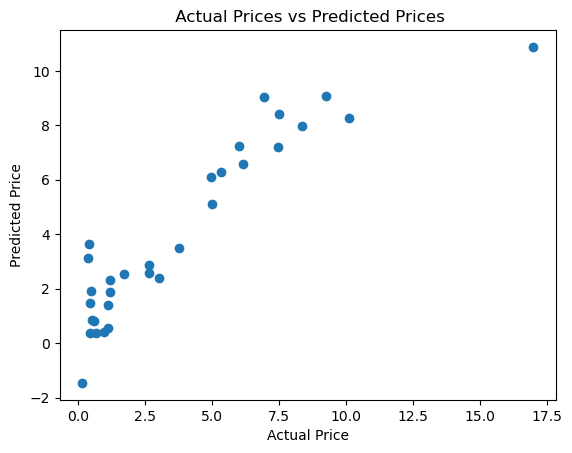

In [17]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### 2-Lasso Regression

In [18]:
lass_reg_model = Lasso()

In [19]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [20]:
training_data_pred = lass_reg_model.predict(x_train)
error_score = metrics.r2_score(y_train, training_data_pred)
print(f"R squared Error : {error_score}")

R squared Error : 0.8436909482009372


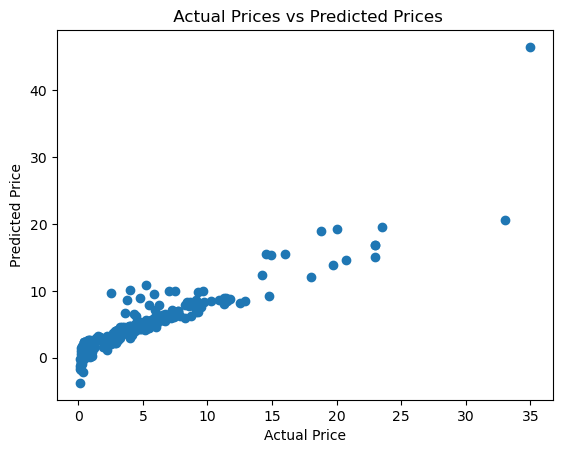

In [21]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [22]:
test_data_prediction = lass_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared Error :{error_score} ")

R squared Error :0.839226320049874 


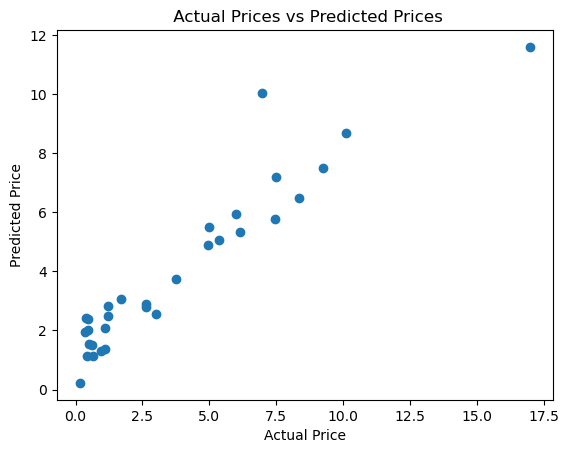

In [23]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()